<a href="https://colab.research.google.com/github/rsbatistajuliana/dio-datascience-pandas/blob/main/bootamp_dio_analise_exploratoria_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [75]:
#upload do arquivo - arquivo não fica salvo, tem que fazer upload toda vez que entrar
from google.colab import files
arq=files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [76]:
#Criação do nosso dataframe
df = pd.read_excel("AdventureWorks.xlsx")

In [77]:
#Visualizando o formato do df
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [78]:
#Valor venda é a receita
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [79]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

# Questionamentos 

In [80]:
###############   Qual a soma da receita total?
df["Valor Venda"].sum()

5984606.1426

In [81]:
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [82]:
############### Qual o custo total?
#Calculo o custo por venda:
df["Custo"]=df["Custo Unitário"].mul(df["Quantidade"])
#criou uma coluna no df
df["Custo"]


0                 2,091.48
1                 2,091.48
2                 2,091.48
3                 2,091.48
4                 2,091.48
              ...         
899               1,985.94
900               1,948.14
901               1,948.14
902               1,985.94
903               1,948.14
Name: Custo, Length: 904, dtype: float64

In [83]:
#Agora sim o custo total:
#round() - arredonda par 2 casa decimais
Custo_Total=round(df["Custo"].sum(),2)
Custo_Total

2486783.05

In [84]:
#########total do lucro ???
#Lucro por venda:
df["Lucro"]=df["Valor Venda"]- df["Custo"]

In [85]:
#Agora sim o lucro total:
Lucro_Total=round(df["Lucro"].sum(),2)
Lucro_Total

3497823.09

**Missing values**


In [42]:
#Verificar se temos valores ausentes 
df.isnull().sum() #nao temos

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

# Questionamentos

**Qual média do tempo de envio para cada marca?**




In [87]:
##### Tempo de envio do produto??
# 1- criar coluna com o total de dias para envia o produto:
df["Tempo_Envio"] = df["Data Envio"] - df["Data Venda"]

In [88]:
# 2- Transformar Tempo_Envio em numérica
# dt.days - vai extrair apenas os dias
df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [89]:
df["Tempo_Envio"].dtype #precisa ser tipo int

dtype('int64')

In [41]:
#Agora calcularemos a média de tempo de envio por marca -  2 colunas relacionadas : groupby()
df.groupby("Marca")["Tempo_Envio"].mean()
Tempo_Medio = round(df.groupby("Marca")["Tempo_Envio"].mean(),2)
Tempo_Medio

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: Tempo_Envio, dtype: float64

**Lucro**

In [43]:
###### Qual o Lucro por ano, por marca??
# 1- Agrupar por ano e marca - agrupa ano e marca e calcula a soma do
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [44]:
#como o valor veio em notação científica, podemos melhorar a visualização:
pd.options.display.float_format = '{:20,.2f}'.format

In [45]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()
#Marca Fabrikam diminuiu o lucro nas vendas de 2008 para 2009

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [47]:
### Quero guardar essas infos de lucro em formato de colunas . Como fazer ?? - uso .reset_index() que resetou o indice q antes estava por data de venda.
Lucro_Ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
Lucro_Ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [50]:
###  Qual o total de produtos vendidos? Temos uma coluna quantidade de prod vendidos,
# vamos agrupar por produto, somar a quantidade por produto
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

**Visualização**

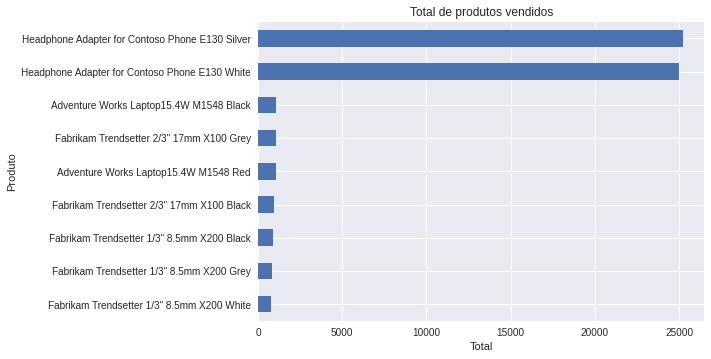

In [52]:
#Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")
plt.xticks(rotation='horizontal') #deixa os rotulos de x na horizontal
;

In [55]:
#Qual o lucro por ano??
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

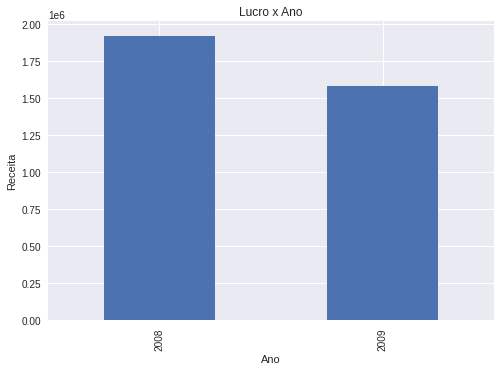

In [54]:
#Qual o grupo por ano graficamente?
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal'); #deixa os rotulos de x na horizontal


**Analisando vendas de 2009**

In [ ]:
#### Analisar as vendas de 2009

df_2009  = df[df["Data Venda"].dt.year == 2009]
df_2009.head(5)

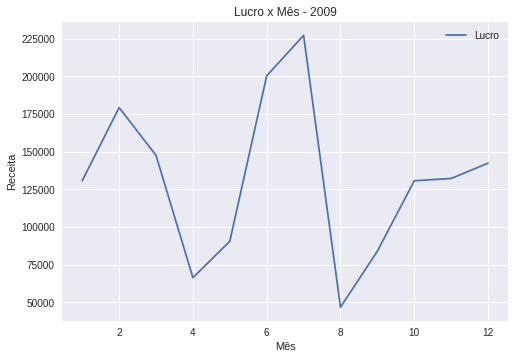

In [60]:
#Lucro mes a mes
df_2009.groupby(df["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês - 2009")# Só .plot é grafico de linha
plt.xlabel("Mês")
plt.ylabel("Receita")
plt.legend();

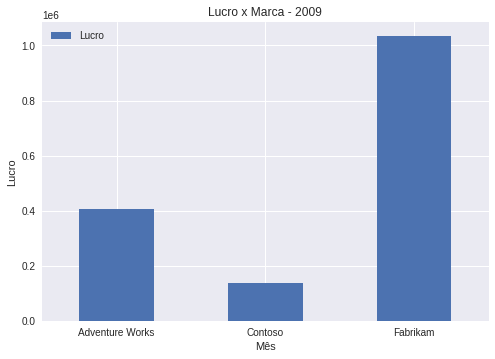

In [65]:
#Lucro por marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca - 2009")# Só .plot é grafico de linha
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal') #deixa os rotulos de x na horizontal
plt.legend();

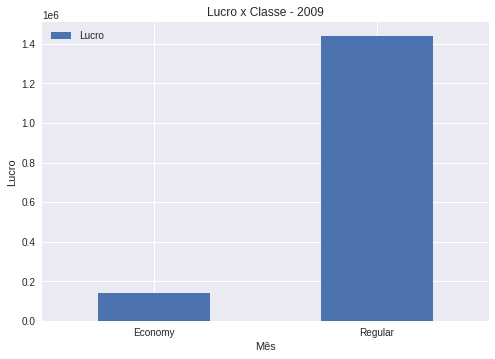

In [66]:
#Qual o lucro por classe??
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe - 2009")# Só .plot é grafico de linha
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal') #deixa os rotulos de x na horizontal
plt.legend();


**Outras análises sobre o tempo de envio usando describe():**

In [67]:
# Outras análises sobre o tempo de envio usando describe():

df["Tempo_Envio"].describe()
# o que nos diz os quartis?
# 25% tem tempo de envio de até 6 dias
# 50% tem tempo de envio de até 9 dias (mediana)
# 75% tem tempo de envio de 11 dias 

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

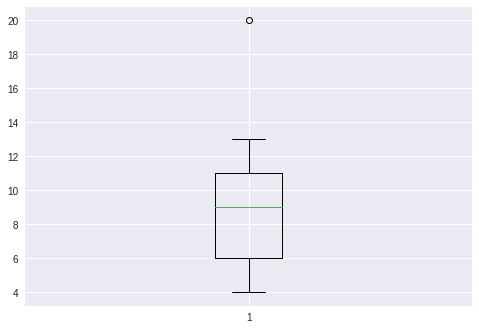

In [68]:
#Gráfico BOXPLOT
# mostra as informações do describe
# - a mediana (50%) é a linha verde
# - o ponto fora é o outlier, discrepante
# pode ser um valor digitado errado, pode ser um valor influenten, influencia nos cálculos, 
# mas pode ter alguma explicação externa. nem sempre é só relacionado ao negocio
plt.boxplot(df["Tempo_Envio"])
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal') #deixa os rotulos de x na horizontal
plt.legend();

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

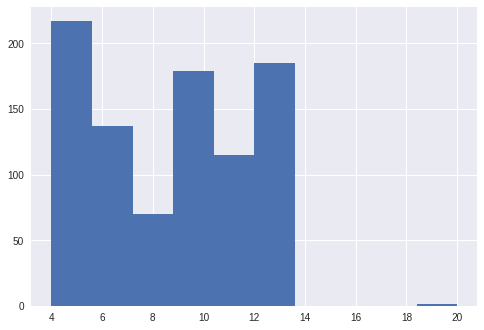

In [69]:
# HISTOGRAMA
plt.hist(df["Tempo_Envio"])
#também mostra o outlier não é tão relevante, poucas ocorrências.
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal') #deixa os rotulos de x na horizontal
plt.legend();

In [71]:
# Tempos de envio
print(df["Tempo_Envio"].min())
print(df["Tempo_Envio"].max())

4
20


In [72]:
#Verificar qual foi a venda que teve o tempo outlier
df[df["Tempo_Envio"]== 20] # foi a primeira venda da tabela, única na tabela.

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [73]:
#Finalizei a análise e quero salvar em um novo arquivo:
df.to_csv('df_venda_novo.csv', index=False)